In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
# first half + second half = sparsity, density, n_vars
# envs : envs
# samples : sample_size

EXPERIMENT = 'pairwise_power'

# dfs = []
# for tag in ['envs', 'first_half', 'second_half', 'samples']:
#     df = pd.read_csv(f'./results/{EXPERIMENT}_results_{tag}.csv', sep=', ', engine='python')
#     if len(dfs) > 0:
#         df['params_index'] += dfs[-1]['params_index'].max() + 1
#     dfs.append(df)

# df = pd.concat(dfs, ignore_index=True)

# df.to_csv(f'./results/{EXPERIMENT}_results.csv', sep=',')

tag = 'paper'

df = pd.read_csv(f'./results/{EXPERIMENT}_results_{tag}.csv', sep=',', engine='python')

In [6]:
print('NA precisions: ', np.sum(1-df['Precision'].notna()))
df = df.loc[df['Precision'].notna(), :]

df['Fraction of shifting mechanisms'] = df['sparsity'] / df['n_variables']

# plot_df = df.melt(
#     id_vars=[
#         'params_index', 'n_variables', 'n_total_environments', 'sparsity', 'Fraction of shifting mechanisms',
#         'sample_size', 'dag_density', 'reps', 'data_simulator', 'dag_simulator',
#         'Method', 'Number of environments', 'Rep', 'MEC size', 'Soft'],
#     # value_vars=['True orientation rate', 'False orientation rate', 'Average precision'], # 'Fraction of possible DAGs'], 
#     value_vars=['Precision', 'Recall'], #'Average precision'],
#     var_name='Metric',
#     value_name='Average fraction',
# )

x_var_rename_dict = {
    'Number of environments': '# Environments',
    'Fraction of shifting mechanisms': 'Shift fraction',
    'dag_density': 'Edge density',
    'n_variables': '# Variables',
    'sample_size': '# Samples',
}

plot_df = df.rename(
        x_var_rename_dict, axis=1
    ).replace(
        {'er': 'Erdos-Renyi', 'ba': 'Hub', 'PC (pool all)': 'Full PC (oracle)'}
)

NA precisions:  0


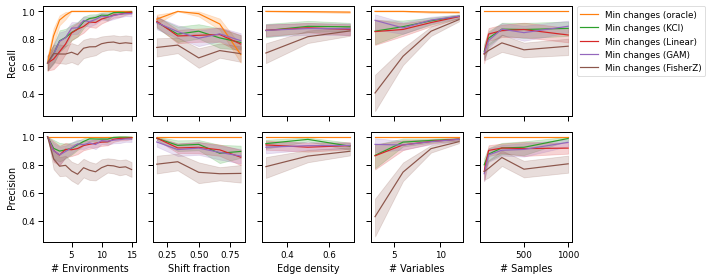

In [7]:
sns.set_context('paper')

grid_vars = list(x_var_rename_dict.values())
metrics = ['Recall', 'Precision']#, 'Average precision']

n_settings = [1, 5, 3, 4, 5]

indices = [
    (a, b) for a, b in zip(np.cumsum([0] + n_settings)[:-1], np.cumsum(n_settings))
]

# for graph_model in plot_df['dag_simulator'].unique():
fig, axes = plt.subplots(
    len(metrics),
    len(grid_vars),
    sharey='row', sharex='col',
    figsize=(2*len(grid_vars), 4)
)

for row, metric in zip(axes, metrics):
# for row, metric in zip(axes, ['Recall', 'Precision', 'Average precision']):
    for g_var, (lb, ub), ax in zip(grid_vars, indices, row):
        plot_df_ax = plot_df[
                (plot_df['params_index'] >= lb)
                & (plot_df['params_index'] < ub)
                # & (plot_df['dag_simulator'] == graph_model)
                & (~plot_df['Method'].isin(['Full PC (oracle)']))
                & (plot_df['Soft'] == False)
            ]
        
        if g_var != '# Environments':
            plot_df_ax = plot_df_ax[
                # IMPORTANT! otherwise average over all number of environments
                plot_df_ax['# Environments'] == plot_df_ax['# Environments'].max()
            ]
        
        sns.lineplot(
            data=plot_df_ax,
            x=g_var,
            y=metric,
            hue='Method',
            ax=ax,
            palette=[
                sns.color_palette("tab10")[i]
                for i in [1, 2, 3, 4, 5]
            ],
            # markers=['d', 'P', 's'],
            # palette='Set1',
            legend='full',
            # alpha=1,
        )

        # ax.axvline(0.05, ls=':', c='grey')
        # ax.set_title('')
        # ax.legend(loc='upper right')
leg_idx = 4
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes = np.concatenate(axes)
for i in range(len(axes)):
    if i == leg_idx:
        axes[i].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    else:
        axes[i].get_legend().remove()

# plt.ylim([0, 1.03])

# plt.suptitle(f'DAG model: {graph_model}', fontsize=14, y=0.96, x=0.45)
plt.tight_layout()
plt.savefig(f'./figures/empirical_select_rates_er.pdf')
plt.show()

## Soft

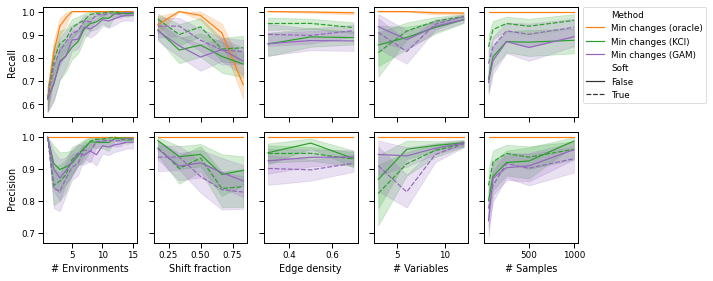

In [10]:
sns.set_context('paper')

grid_vars = list(x_var_rename_dict.values())
metrics = ['Recall', 'Precision']#, 'Average precision']

n_settings = [1, 5, 3, 4, 5]

indices = [
    (a, b) for a, b in zip(np.cumsum([0] + n_settings)[:-1], np.cumsum(n_settings))
]

# for graph_model in plot_df['dag_simulator'].unique():
fig, axes = plt.subplots(
    len(metrics),
    len(grid_vars),
    sharey='row', sharex='col',
    figsize=(2*len(grid_vars), 4)
)

for row, metric in zip(axes, metrics):
# for row, metric in zip(axes, ['Recall', 'Precision', 'Average precision']):
    for g_var, (lb, ub), ax in zip(grid_vars, indices, row):
        plot_df_ax = plot_df[
                (plot_df['params_index'] >= lb)
                & (plot_df['params_index'] < ub)
                # & (plot_df['dag_simulator'] == graph_model)
                & (~plot_df['Method'].isin(['Full PC (oracle)', 'Min changes (Linear)', 'Min changes (FisherZ)']))
                # & (plot_df['Soft'] == False)
            ]
        
        if g_var != '# Environments':
            plot_df_ax = plot_df_ax[
                # IMPORTANT! otherwise average over all number of environments
                plot_df_ax['# Environments'] == plot_df_ax['# Environments'].max()
            ]
        
        sns.lineplot(
            data=plot_df_ax,
            x=g_var,
            y=metric,
            hue='Method',
            style='Soft',
            ax=ax,
            palette=[
                sns.color_palette("tab10")[i]
                for i in [1, 2, 4]
            ],
            # markers=['d', 'P', 's'],
            # palette='Set1',
            legend='full',
            # alpha=1,
        )

        # ax.axvline(0.05, ls=':', c='grey')
        # ax.set_title('')
        # ax.legend(loc='upper right')
leg_idx = 4
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes = np.concatenate(axes)
for i in range(len(axes)):
    if i == leg_idx:
        axes[i].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    else:
        axes[i].get_legend().remove()

# plt.ylim([0, 1.03])

# plt.suptitle(f'DAG model: {graph_model}', fontsize=14, y=0.96, x=0.45)
plt.tight_layout()
plt.savefig(f'./figures/empirical_select_rates_er_soft.pdf')
plt.show()